In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.152
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomi

In [2]:
!cat /proc/meminfo

MemTotal:       16399576 kB
MemFree:         9093080 kB
MemAvailable:   15572684 kB
Buffers:          773684 kB
Cached:          5610700 kB
SwapCached:            0 kB
Active:          3063024 kB
Inactive:        3752824 kB
Active(anon):     364060 kB
Inactive(anon):      336 kB
Active(file):    2698964 kB
Inactive(file):  3752488 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               108 kB
Writeback:             0 kB
AnonPages:        431404 kB
Mapped:           176636 kB
Shmem:               852 kB
KReclaimable:     366292 kB
Slab:             413960 kB
SReclaimable:     366292 kB
SUnreclaim:        47668 kB
KernelStack:        3392 kB
PageTables:         3332 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     8199788 kB
Committed_AS:    2057228 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       33512 kB
VmallocChunk:          0 kB
Percpu:          

In [3]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-2ae44804-7041-be37-1b54-40e3cc9504e8)


In [4]:
!nvidia-smi

Tue Aug 10 15:49:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install imutils

In [6]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

plt.style.use('ggplot')

In [7]:
os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/")

['test', 'train']

In [8]:
imagePathsTrain = list(paths.list_images("/kaggle/input/covid19-image-dataset/Covid19-dataset/train"))
trainX = []
trainY = []

for imagePath in imagePathsTrain:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	trainX.append(image)
	trainY.append(label)

trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)

lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
trainY = to_categorical(trainY)

In [9]:
imagePathsTest = list(paths.list_images("/kaggle/input/covid19-image-dataset/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [10]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.15, random_state=42, stratify=trainY)

In [11]:
print("SHAPE OF TRAIN FEATURES: "+str(trainX.shape))
print("SHAPE OF TRAIN LABELS: "+str(trainY.shape))
print("SHAPE OF VALIDATION FEATURES: "+str(valX.shape))
print("SHAPE OF VALIDATION LABELS: "+str(valY.shape))
print("SHAPE OF TEST FEATURES: "+str(testX.shape))
print("SHAPE OF TEST LABELS: "+str(testY.shape))

SHAPE OF TRAIN FEATURES: (213, 224, 224, 3)
SHAPE OF TRAIN LABELS: (213, 3)
SHAPE OF VALIDATION FEATURES: (38, 224, 224, 3)
SHAPE OF VALIDATION LABELS: (38, 3)
SHAPE OF TEST FEATURES: (66, 224, 224, 3)
SHAPE OF TEST LABELS: (66, 3)


In [12]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [13]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [14]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = True

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [15]:
HR = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(valX, valY),
	validation_steps=len(valX) // BS,
	epochs=EPOCHS)

Epoch 1/20
6/6 [==============================] - 11s 748ms/step - loss: 1.1869 - accuracy: 0.4563 - val_loss: 0.8516 - val_accuracy: 0.6316
Epoch 2/20
6/6 [==============================] - 3s 418ms/step - loss: 0.7798 - accuracy: 0.5997 - val_loss: 0.6729 - val_accuracy: 0.8158
Epoch 3/20
6/6 [==============================] - 2s 368ms/step - loss: 0.5751 - accuracy: 0.7681 - val_loss: 0.5342 - val_accuracy: 0.8947
Epoch 4/20
6/6 [==============================] - 2s 365ms/step - loss: 0.3855 - accuracy: 0.8224 - val_loss: 0.2871 - val_accuracy: 0.9474
Epoch 5/20
6/6 [==============================] - 2s 391ms/step - loss: 0.3468 - accuracy: 0.8702 - val_loss: 0.3329 - val_accuracy: 0.8684
Epoch 6/20
6/6 [==============================] - 3s 485ms/step - loss: 0.2491 - accuracy: 0.9133 - val_loss: 0.7346 - val_accuracy: 0.7895
Epoch 7/20
6/6 [==============================] - 2s 360ms/step - loss: 0.2090 - accuracy: 0.9221 - val_loss: 0.8939 - val_accuracy: 0.7895
Epoch 8/20
6/6 [===

In [16]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

Accuracy = (accuracy_score(testY.argmax(axis=1),predIdxs)*100)
print('TEST ACCURACY in Percentage:', round(Accuracy,2),'%')
print("")
print("-------------------------------------------------------------------")
print("")
print("CLASSIFICATION REPORT:")
print("")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

TEST ACCURACY in Percentage: 95.45 %

-------------------------------------------------------------------

CLASSIFICATION REPORT:

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      0.85      0.92        20
Viral Pneumonia       0.87      1.00      0.93        20

       accuracy                           0.95        66
      macro avg       0.96      0.95      0.95        66
   weighted avg       0.96      0.95      0.95        66



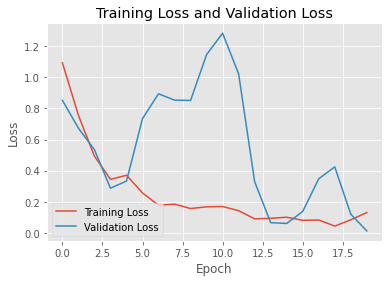

In [17]:
N = EPOCHS

plt.figure()
plt.plot(np.arange(0, N), HR.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), HR.history["val_loss"], label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("LossPlotWMF.png")

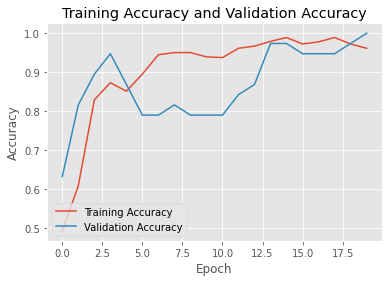

In [18]:
plt.figure()
plt.plot(np.arange(0, N), HR.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), HR.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("AccuracyPlotWMF.png")